In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import re

In [2]:
domain_list = ['photo', 'art_painting', 'cartoon', 'sketch']
metric = "AUPRC"

dir_path = '../results/Baseline/PACS/PReNet'
# dir_path = '../results/Baseline/PACS/RoSAS'
# dir_path = '../results/Baseline/PACS/DeepSAD'
# dir_path = '../results/Baseline/PACS_contamination/DeepSAD'

In [3]:
import itertools
# normal_class=["0", "1", "2", "3", "4", "5", "6"]
# normal_class=["0 1 2 3", "4 5 6", "0 2 4 6", "1 3 5", "0", "1", "2", "3", "4", "5", "6"]
# anomaly_class=["4 5 6", "0 1 2 3", "1 3 5", "0 2 4 6", "1 2 3 4 5 6", "0 2 3 4 5 6", "0 1 3 4 5 6", "0 1 2 4 5 6", "0 1 2 3 5 6", "0 1 2 3 4 6", "0 1 2 3 4 5"]
# epochs_list=[5, 10, 15, 20, 30]
# lr_list=[0.01, 0.001, 0.0005, 0.0002, 0.00005, 0.00001]
reg_lambda=[1,2,5,10]
NCE_lambda=[1,2,5,10]
PL_lambda=[1,2,5,10]
# cnt=[0,1,2,3,4]
cnt=[0]
all_para_list = list(itertools.product(reg_lambda, NCE_lambda, PL_lambda, cnt))
print(len(all_para_list))
all_para_list[0]

64


(1, 1, 1, 0)

In [4]:
ans = []
para_name_list=["contamination_rate", "normal_class", "anomaly_class", "lr", "epochs", "batch_size", "cnt",]


print(len(os.listdir(dir_path)))
for file_name in os.listdir(dir_path):
    data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
    record = []
    args = data["args"].item()
    result = data["result"].item()
    for para in para_name_list:
        record.append(args[para])

    for key in ["val"] + domain_list:
        record.append(result[key]["AUC"])
    
    for key in ["val"] + domain_list:
        record.append(result[key]["AP"])

    record.append(file_name)
    ans.append(record)

ans = pd.DataFrame(ans,columns=para_name_list +\
             [f'{item}_AUROC' for item in ["val"] + domain_list] + \
                [f'{item}_AUPRC' for item in ["val"] + domain_list] + ["file_name"])

ans["normal_class"] = ans["normal_class"].astype(str)
ans["anomaly_class"] = ans["anomaly_class"].astype(str)
ans["AUROC_mean"] = ans[["art_painting_AUROC","cartoon_AUROC","photo_AUROC","sketch_AUROC"]].mean(axis = 1)
ans["AUPRC_mean"] = ans[["art_painting_AUPRC","cartoon_AUPRC","photo_AUPRC","sketch_AUPRC"]].mean(axis = 1)
# ans["val_AUROC_mean"] = ans[["val_art_painting_AUROC","val_cartoon_AUROC","val_photo_AUROC","val_sketch_AUROC"]].mean(axis = 1)
# ans["val_AUPRC_mean"] = ans[["val_art_painting_AUPRC","val_cartoon_AUPRC","val_photo_AUPRC","val_sketch_AUPRC"]].mean(axis = 1)
ans["normal_class"] = ans["normal_class"].apply(lambda x :re.sub("\[|\]|,", "", x))
ans["anomaly_class"] = ans["anomaly_class"].apply(lambda x :re.sub("\[|\]|,", "", x))
ans.head(5)

1260


,contamination_rate,normal_class,anomaly_class,lr,epochs,batch_size,cnt,val_AUROC,photo_AUROC,art_painting_AUROC,cartoon_AUROC,sketch_AUROC,val_AUPRC,photo_AUPRC,art_painting_AUPRC,cartoon_AUPRC,sketch_AUPRC,file_name,AUROC_mean,AUPRC_mean
0,0.0,0,1 2 3 4 5 6,0.00010,40,32,3,0.900794,1.000000,0.873333,0.744589,0.824675,0.770707,1.000000,0.521176,0.469247,0.368845,"method=0,backbone=PReNet,domain_cnt=3,normal_c...",0.860649,0.589817
1,0.0,4,0 1 2 3 5 6,0.00010,60,32,1,0.906130,0.854701,0.966667,0.768229,0.798569,0.799475,0.858333,0.830159,0.377646,0.517409,"method=0,backbone=PReNet,domain_cnt=3,normal_c...",0.847041,0.645887
2,0.0,5,0 1 2 3 4 6,0.00005,60,128,1,0.997182,1.000000,1.000000,0.991228,0.854167,0.981566,1.000000,1.000000,0.944444,0.827778,"method=0,backbone=PReNet,domain_cnt=3,normal_c...",0.961349,0.943056
3,0.0,1,0 2 3 4 5 6,0.00001,60,64,2,0.902588,1.000000,0.931373,0.917582,0.639640,0.538866,1.000000,0.711111,0.432190,0.379407,"method=0,backbone=PReNet,domain_cnt=3,normal_c...",0.872149,0.630677
4,0.0,6,0 1 2 3 4 5,0.00001,20,64,0,0.908846,1.000000,0.930712,0.884774,0.869792,0.401009,1.000000,0.444444,0.574641,0.629471,"method=0,backbone=PReNet,domain_cnt=3,normal_c...",0.921319,0.662139


In [5]:
ans["normal_class"].value_counts()

0    180
4    180
5    180
1    180
6    180
3    180
2    180
Name: normal_class, dtype: int64

In [6]:
ans.cnt.value_counts()

3    252
1    252
2    252
0    252
4    252
Name: cnt, dtype: int64

In [7]:
# pre_epochs_list = [10, 30, 50, 100]
# pre_lr_list = [0.01, 0.001, 0.0001]
# epochs_list = [10, 20, 30]
# lr_list = [0.00001, 0.0001, 0.001]
# cnt = [0, 1]
# all_para_list = list(itertools.product(cnt, pre_epochs_list, pre_lr_list, epochs_list, lr_list))
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[["cnt", "pre_epochs", "pre_lr", "epochs", "lr"]].values])
# remain_para = pd.DataFrame(sorted(remain_para), columns=["cnt", "pre_epochs", "pre_lr", "epochs", "lr"])
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# # remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [8]:
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[(ans["epochs"]==30) & (ans["lr"]==0.00005) & (ans["cnt"] == 0)][["reg_lambda", "NCE_lambda", "PL_lambda", "cnt"]].values])
# remain_para = pd.DataFrame(remain_para, columns=["reg_lambda", "NCE_lambda", "PL_lambda", "cnt"])
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# # remain_para
# len(remain_para)

In [9]:
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[["normal_class", "epochs", "lr", "cnt"]].values])
# remain_para = pd.DataFrame(remain_para, columns=["normal_class", "epochs", "lr", "cnt"])
# remain_para.insert(1,"anomaly_class", remain_para.apply(lambda x: re.sub("\{|,|\}","", str(set([0,1,2,3,4,5,6]) - set(map(int, x["normal_class"].split(" "))))), axis=1))
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [10]:
if metric == "AUPRC":
    columns_to_drop = ans.filter(like='AUROC').columns.to_list()
    columns_to_drop.remove("AUROC_mean")
else:
    columns_to_drop = ans.filter(like='AUPRC').columns.to_list()
    columns_to_drop.remove("AUPRC_mean")
# columns_to_drop = columns_to_drop + [f"photo_{metric}",f"art_painting_{metric}",f"cartoon_{metric}",f"sketch_{metric}",f"{metric}_mean"]
ans = ans.drop(columns=columns_to_drop) 
columns_to_drop

['val_AUROC',
 'photo_AUROC',
 'art_painting_AUROC',
 'cartoon_AUROC',
 'sketch_AUROC']

In [11]:
# agg_method = {"cnt":["count"],
#               f"val_AUPRC":["mean","std"],
#               f"photo_{metric}":["mean", "std"],
#               f"art_painting_{metric}":["mean", "std"],
#               f"cartoon_{metric}":["mean", "std"],
#               f"sketch_{metric}":["mean", "std"],
#               f"{metric}_mean":["mean", "std"],
#               f"AUROC_mean":["mean", "std"],
#               f"AUPRC_mean":["mean", "std"],
#               }

# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

# for normal_class in ["0", "1", "2", "3", "4", "5", "6"]:
#     selected_records = ans[ans["normal_class"] == normal_class].drop(["normal_class", "anomaly_class"],axis=1)
#     # group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
#     group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
#     group_key.sort()
#     # print(group_key)
#     selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}", "mean"), ascending=False)
#     selected_para = selected_records_anslysis.index[0]
#     # print(selected_para)
#     selected_records_anslysis

#     filter = None
#     for idx, item in enumerate(group_key):
#         if filter is None:
#             filter = selected_records[item] == selected_para[idx]
#         else:
#             filter = filter & (selected_records[item] == selected_para[idx])
#     temp = selected_records[filter].agg(["mean", "std"]).T
#     temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
#     for key in [f'{item}_{metric}' for item in domain_list]:
#         print(temp.loc[key]["res"])
#     print(f'{round(selected_records_anslysis.loc[selected_para][f"{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"{metric}_mean"]["std"] * 100, 2)})')
#     selected_records[filter]

100.0(0.0)
54.12(3.88)
49.7(5.1)
42.81(2.83)
61.66(2.44)
100.0(0.0)
98.1(1.06)
56.55(3.25)
23.38(3.47)
69.5(1.0)
86.39(1.86)
89.89(2.16)
57.1(1.53)
38.85(0.41)
68.06(0.19)
100.0(0.0)
100.0(0.0)
100.0(0.0)
73.54(0.61)
93.39(0.15)
90.32(5.86)
83.22(1.65)
34.26(4.33)
49.27(4.16)
64.27(0.89)
100.0(0.0)
100.0(0.0)
95.56(0.62)
88.38(3.62)
95.98(1.06)
100.0(0.0)
94.44(0.0)
50.48(8.61)
41.84(10.11)
71.69(2.8)


/tmp/ipykernel_35793/1367525036.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T
/tmp/ipykernel_35793/1367525036.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T
/tmp/ipykernel_35793/1367525036.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T
/tmp/ipykernel_35793/1367525036.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these 

In [12]:
# ans[(ans["normal_class"] == normal_class)].sort_values(by="val_AUROC_mean",ascending=False)

In [13]:
# remain_para = []
# for item in selected_records_anslysis.index[:10]:
#     remain_para.append(list(item))
# remain_para = pd.DataFrame(remain_para)
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)

In [15]:
# agg_method = {"cnt":["count"],
#               f"val_AUPRC":["mean","std"],
#               f"photo_{metric}":["mean", "std"],
#               f"art_painting_{metric}":["mean", "std"],
#               f"cartoon_{metric}":["mean", "std"],
#               f"sketch_{metric}":["mean", "std"],
#               f"{metric}_mean":["mean", "std"],
#               f"AUROC_mean":["mean", "std"],
#               f"AUPRC_mean":["mean", "std"],
#               }

# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

# for contamination_rate in [0.02, 0.04, 0.06, 0.08, 0.10, 0.12]:
#     selected_records = ans[ans["contamination_rate"] == contamination_rate].drop(["normal_class", "anomaly_class"],axis=1)
#     # group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
#     group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
#     group_key.sort()
#     # print(group_key)
#     selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}", "mean"), ascending=False)
#     selected_para = selected_records_anslysis.index[0]
#     # print(selected_para)
#     selected_records_anslysis

#     filter = None
#     for idx, item in enumerate(group_key):
#         if filter is None:
#             filter = selected_records[item] == selected_para[idx]
#         else:
#             filter = filter & (selected_records[item] == selected_para[idx])
#     temp = selected_records[filter].agg(["mean", "std"]).T
#     temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
#     for key in [f'{item}_{metric}' for item in domain_list]:
#         print(temp.loc[key]["res"])
#     print(f'{round(selected_records_anslysis.loc[selected_para][f"{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"{metric}_mean"]["std"] * 100, 2)})')
#     selected_records[filter]

In [ ]:
agg_method = {"cnt":["count"],
              f"val_AUPRC":["mean","std"],
              f"photo_{metric}":["mean", "std"],
              f"art_painting_{metric}":["mean", "std"],
              f"cartoon_{metric}":["mean", "std"],
              f"sketch_{metric}":["mean", "std"],
              f"{metric}_mean":["mean", "std"],
              f"AUROC_mean":["mean", "std"],
              f"AUPRC_mean":["mean", "std"],
              }

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
normal_class = '0'
selected_records = ans[ans["normal_class"] == normal_class].drop(["normal_class", "anomaly_class"],axis=1)
# group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
group_key.sort()
print(group_key)
selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}", "mean"), ascending=False)
selected_para = selected_records_anslysis.index[0]
print(selected_para)
selected_records_anslysis

['batch_size', 'contamination_rate', 'epochs', 'lr']
(32, 0.02, 40, 1e-05)


cnt val_AUPRC            \
                                             count      mean       std   
batch_size contamination_rate epochs lr                                  
32         0.02               40     0.00001     5  0.726316  0.036735   
64         0.02               60     0.00001     5  0.724996  0.027771   
128        0.02               20     0.00010     5  0.714736  0.028451   
64         0.02               20     0.00005     5  0.708651  0.050512   
                              40     0.00001     5  0.697898  0.038273   
128        0.02               40     0.00005     5  0.694490  0.036006   
32         0.02               60     0.00001     5  0.693874  0.023649   
                              20     0.00001     5  0.691812  0.058246   
128        0.02               20     0.00005     5  0.690419  0.058842   
                              40     0.00010     5  0.685172  0.027045   
                              60     0.00001     5  0.678267  0.055922   
                              40     0.00001     5  0.677928  0.084862   
64         0.02               20     0.00010     5  0.674300  0.022051   
128        0.02               60     0.00005     5  0.670540  0.035413   
32         0.02               20     0.00005     5  0.668070  0.030044   
64         0.02               20     0.00001     5  0.662486  0.098246   
                              40     0.00005     5  0.650888  0.019731   
128        0.02               60     0.00010     5  0.635644  0.039575   
64         0.02               40     0.00010     5  0.633862  0.031136   
32         0.02               20     0.00010     5  0.631065  0.022951   
128        0.02               20     0.00050     5  0.618998  0.047955   
64         0.02               60     0.00005     5  0.617442  0.030929   
32         0.02               40     0.00005     5  0.614833  0.016658   
                              60     0.00005     5  0.603240  0.026159   
128        0.02               60     0.00050     5  0.601567  0.017211   
32         0.02               60     0.00010     5  0.592138  0.009026   
64         0.02               60     0.00010     5  0.590816  0.009656   
                              40     0.00050     5  0.585275  0.031343   
                              20     0.00050     5  0.583827  0.023217   
32         0.02               40     0.00010     5  0.582015  0.029778   
128        0.02               40     0.00050     5  0.574583  0.032428   
32         0.02               20     0.00050     5  0.561024  0.042707   
128        0.04               20     0.00001     5  0.559620  0.048991   
32         0.02               40     0.00050     5  0.554124  0.053712   
128        0.02               20     0.00001     5  0.545113  0.087313   
32         0.04               40     0.00001     5  0.542298  0.043833   
128        0.04               20     0.00005     5  0.540837  0.045576   
64         0.04               20     0.00005     5  0.539661  0.041374   
                              60     0.00001     5  0.539616  0.023854   
128        0.04               20     0.00010     5  0.538816  0.020001   
                              60     0.00001     5  0.538575  0.028273   
64         0.02               60     0.00050     5  0.537866  0.020098   
           0.04               40     0.00001     5  0.536116  0.052901   
32         0.02               60     0.00050     5  0.531248  0.049340   
128        0.04               40     0.00005     5  0.529530  0.028280   
32         0.04               20     0.00001     5  0.522325  0.014434   
128        0.04               60     0.00005     5  0.511161  0.028401   
32         0.04               20     0.00005     5  0.511060  0.030318   
128        0.04               40     0.00001     5  0.508857  0.044457   
                                     0.00010     5  0.508527  0.027339   
64         0.04               20     0.00001     5  0.502813  0.048653   
32         0.04               60     0.00001     5 

In [ ]:
# tmp = pd.DataFrame([["0","1","1","1"],
# ["1","1","1","0"],
# ["1","1","0","1"],
# ["0","1","1","0"],
# ["0","1","0","1"],
# ["1","1","0","0"],
# ["1","0","0","1"],
# ["1","0","0","0"],
# ["0","0","0","1"],
# ["0","0","0","0"],], columns = ["NCE_lambda","PL_lambda","class_lambda","reg_lambda"], dtype=float)

# for item in list(map(tuple,tmp.to_numpy())):
#     record = selected_records_anslysis.loc[item]
#     for key in [f'val_{item}_{metric}' for item in domain_list]:
#         print(f'{round(record.loc[key]["mean"] * 100, 2)}({round(record.loc[key]["std"] * 100, 2)})', end='\t')
#     print(f'{round(record[f"val_{metric}_mean"]["mean"] * 100, 2)}({round(record[f"val_{metric}_mean"]["std"] * 100, 2)})', end='\t')
#     print()

In [ ]:
filter = None
for idx, item in enumerate(group_key):
    if filter is None:
        filter = selected_records[item] == selected_para[idx]
    else:
        filter = filter & (selected_records[item] == selected_para[idx])
temp = selected_records[filter].agg(["mean", "std"]).T
temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
for key in [f'{item}_{metric}' for item in domain_list]:
    print(temp.loc[key]["res"])
print(f'{round(selected_records_anslysis.loc[selected_para][f"{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"{metric}_mean"]["std"] * 100, 2)})')
selected_records[filter]

100.0(0.0)
51.53(6.16)
52.46(6.88)
38.42(1.97)
60.6(1.67)


/tmp/ipykernel_79411/2955454207.py:7: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T


,contamination_rate,lr,epochs,batch_size,cnt,val_AUPRC,photo_AUPRC,art_painting_AUPRC,cartoon_AUPRC,sketch_AUPRC,file_name,AUROC_mean,AUPRC_mean
44,0.02,0.00001,40,32,3,0.727937,1.0,0.523626,0.414162,0.400068,"method=0,backbone=DeepSAD,domain_cnt=3,normal_...",0.869455,0.584464
316,0.02,0.00001,40,32,2,0.663238,1.0,0.517521,0.596190,0.365647,"method=0,backbone=DeepSAD,domain_cnt=3,normal_...",0.905379,0.619840
408,0.02,0.00001,40,32,1,0.751479,1.0,0.563853,0.518423,0.360004,"method=0,backbone=DeepSAD,domain_cnt=3,normal_...",0.891926,0.610570
602,0.02,0.00001,40,32,4,0.752355,1.0,0.411508,0.564064,0.395656,"method=0,backbone=DeepSAD,domain_cnt=3,normal_...",0.900974,0.592807
642,0.02,0.00001,40,32,0,0.736574,1.0,0.559936,0.530180,0.399603,"method=0,backbone=DeepSAD,domain_cnt=3,normal_...",0.907861,0.622430


In [ ]:
file_name = selected_records[filter].file_name.iloc[0]
data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
data

NpzFile '../results/Baseline/PACS_contamination/DeepSAD/method=0,backbone=DeepSAD,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6],batch_size=32,epochs=40,lr=1e-05,cnt=3,contamination=0.02.npz' with keys: result, args

In [ ]:

# # data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
# file_name = 'results/DGAD/VAE_LPIPS/method=VAE_LPIPS,backbone=VAE,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6],batch_size=30,steps_per_epoch=20,epochs=250,lr=0.0001,tau1=0.07,tau2=0.07,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,BalancedBatchSampler=1,cnt=2.npz'
# data = np.load(f'../{file_name}', allow_pickle=True)
# data
# max_val_epoch = data["val_max_metric"].item()["epoch"]
# plt.plot(data["train_results_loss"].mean(axis=1)[0:], label = "train")
# plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.plot(data["val_results_loss"].mean(axis=1), label = "val")
# plt.legend()
# data["train_results_loss"].mean(axis=1)[-10:], data["val_results_loss"].mean(axis=1)[-10:]

In [ ]:
# tmp_list = []
# for file_name in selected_records[filter].file_name:
#     data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
#     domain_test_trends = dict()
#     for domain in domain_list:
#         domain_test_trends[domain]={
#             "test_loss_list":[],
#             "AUROC":[],
#             "AUPRC":[],
#         }

#     for res in data["test_results_list"]:
#         if res is not None:
#             for key in res:
#                 domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
#                 domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
#                 domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])
#     tmp = []
#     for domain in domain_list:
#         tmp.append(domain_test_trends[domain][metric][-1]) 
#     tmp.append(np.mean(tmp))
#     tmp_list.append(tmp)

# pd.DataFrame(tmp_list, columns = domain_list + [metric]).agg(["mean", "std"])

In [ ]:
domain_test_trends = dict()
for domain in domain_list:
    domain_test_trends[domain]={
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
    }

domain_test_trends
for res in data["test_results_list"]:
    if res is not None:
        for key in res:
            domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
            domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
            domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])

KeyError: 'test_results_list is not a file in the archive'

### 训练过程中 模型在test上下降趋势

In [ ]:
data["args"].item()["epochs"], data["args"].item()["test_epoch"]

(30, 5)

In [ ]:
data["test_results_list"].shape

(30,)

8
photo [0.6073103154305199, 0.7878787878787878, 0.9444444444444444, 0.9242424242424242, 0.9102564102564102, 0.9047619047619047, 0.9047619047619047]
art_painting [0.5847222222222221, 0.6540045766590389, 0.6850140056022409, 0.6974358974358974, 0.7307692307692307, 0.7313492063492063, 0.7393790849673202]
cartoon [0.17124505323263087, 0.2748316498316498, 0.6197453173997796, 0.6129084967320261, 0.6556547619047618, 0.6369825708061001, 0.6612103174603173]
sketch [0.19466046002190582, 0.4883026969899379, 0.5168426344896933, 0.49032996779475657, 0.5188163758967477, 0.4822237318840579, 0.4899647754671489]


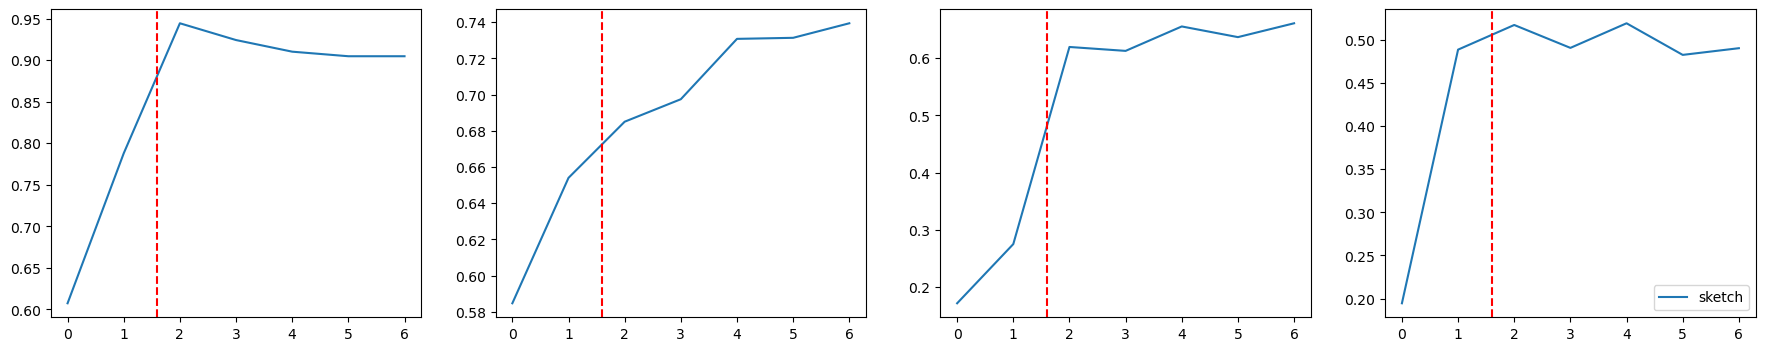

8
photo 0.976190476190476
art_painting 0.6696293902176255
cartoon 0.5988861041492619
sketch 0.5182072829131653


In [ ]:
max_val_epoch = data["val_max_metric"].item()['epoch']
print(max_val_epoch)

fig, ax = plt.subplots(1,4, figsize=(22, 4))

for idx, domain in enumerate(domain_list):
    ax[idx].plot(domain_test_trends[domain][metric], label = domain)
    print(domain, domain_test_trends[domain][metric])

    if "metric" in data["val_max_metric"].item():
        if "test_epoch" in data["args"].item():
            ax[idx].axvline(x=max_val_epoch / data["args"].item()["test_epoch"], color='r', linestyle='--')
        else:
            ax[idx].axvline(x=max_val_epoch / 5, color='r', linestyle='--')
    else:
        ax[idx].axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
plt.legend()
plt.show()

print(max_val_epoch)
if "metric" in data["val_max_metric"].item():
    for domain in domain_list:
        print(domain, data["val_max_metric"].item()["metric"][domain][metric])
else:
    for domain in domain_list:
        print(domain, domain_test_trends[domain][metric][max_val_epoch])

### 训练集loss下降趋势

(8,
 array([5.28886955, 4.38322403, 4.01853641, 3.55174328, 3.05183437,
        2.37842223, 1.63410371, 1.40169107, 1.34998219, 1.28387012,
        1.22243458, 1.17971939, 1.13814693, 1.07974799, 1.06128474,
        0.9886737 , 0.9898708 , 0.94798859, 0.91024781, 0.91156757,
        0.89818378, 0.82926105, 0.84422584, 0.85205433, 0.80298228,
        0.81283612, 0.78568956, 0.81675587, 0.82061009, 0.80976308]))

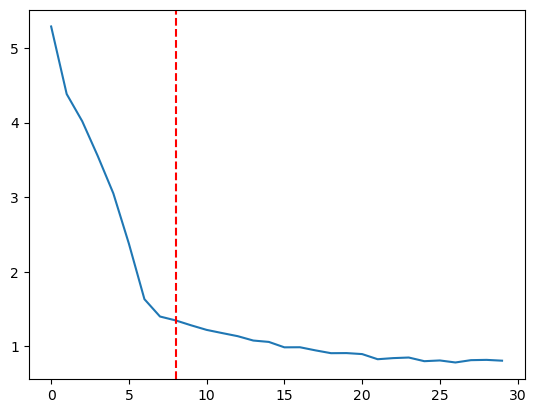

In [ ]:
plt.plot(data["train_results_loss"].mean(axis=1))
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
max_val_epoch, data["train_results_loss"].mean(axis=1)

### 训练过程中，模型在val 下降趋势

#### 验证集loss下降趋势

array([0.77851636, 0.7950029 , 0.79878677, 0.78877648, 0.7618312 ,
       0.73489079, 0.72408812, 0.70009146, 0.68711336, 0.68627836,
       0.68025969, 0.66618612, 0.67135896, 0.66273319, 0.65621176,
       0.65939765, 0.65271131, 0.64991476, 0.65380472, 0.65664809,
       0.64600572, 0.6423661 , 0.63905388, 0.6542508 , 0.65006581,
       0.65333335, 0.64937336, 0.65594956, 0.65371575, 0.65010997])

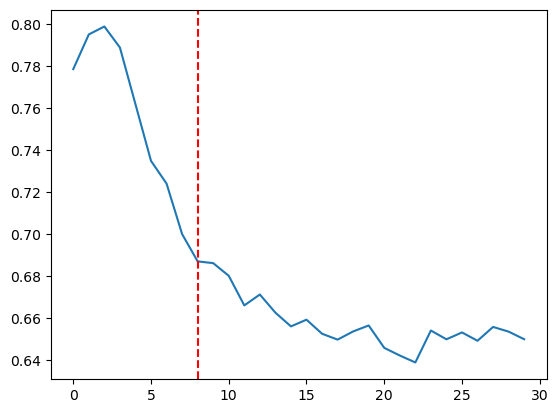

In [ ]:
plt.plot(data["val_results_loss"].mean(axis=1))
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
data["val_results_loss"].mean(axis=1)

#### 验证集AUROC

array([0.78783525, 0.8467433 , 0.86206897, 0.87260536, 0.89128352,
       0.8960728 , 0.89463602, 0.89798851, 0.90373563, 0.90613027,
       0.90565134, 0.90804598, 0.90469349, 0.9085249 , 0.90469349,
       0.90277778, 0.90181992, 0.90565134, 0.89894636, 0.901341  ,
       0.90086207, 0.89798851, 0.89511494, 0.89894636, 0.89463602,
       0.89846743, 0.89559387, 0.89463602, 0.901341  , 0.89798851])

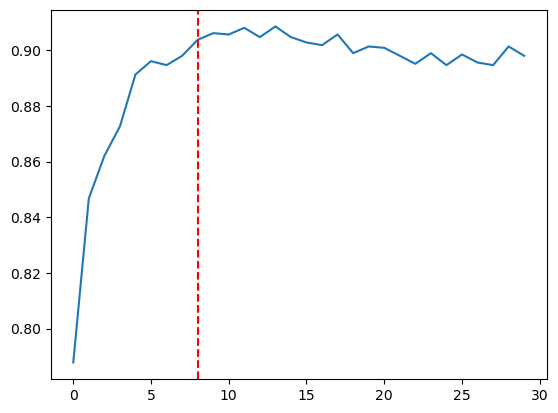

In [ ]:
plt.plot(data[f"val_AUROC_list"])
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
data[f"val_AUROC_list"]

array([0.55195503, 0.59795319, 0.66461697, 0.69549334, 0.74019183,
       0.7671488 , 0.76420324, 0.77485511, 0.79325512, 0.79168215,
       0.78685856, 0.78835646, 0.77345923, 0.78938238, 0.77830838,
       0.76820855, 0.77150642, 0.77271915, 0.75690335, 0.76373727,
       0.76195396, 0.75840131, 0.75677266, 0.75670228, 0.74794509,
       0.74801057, 0.75289669, 0.75252602, 0.75383617, 0.75577678])

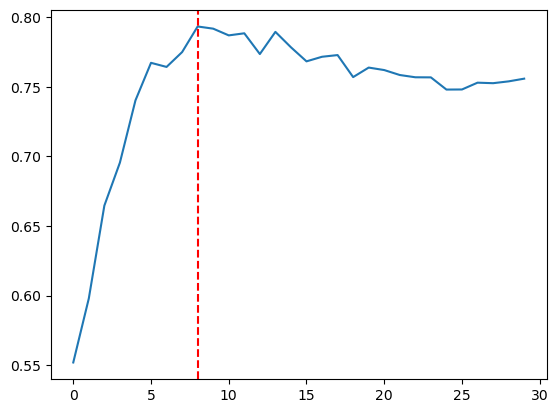

In [ ]:
plt.plot(data[f"val_{metric}_list"])
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
data[f"val_{metric}_list"]

[2.49689738 2.48719748 2.47044274 2.44278829 2.39911208 2.35177013
 2.30190792 2.25863276 2.22978688 2.20096257 2.16641097 2.12855469
 2.09213448 2.05655887 2.01947429 1.98726096 1.95306963 1.92320738
 1.89306868 1.87906294 1.8538812  1.83626109 1.82559207 1.81838395
 1.80249662 1.79696103 1.79666166 1.79411714 1.7874838  1.78935575]


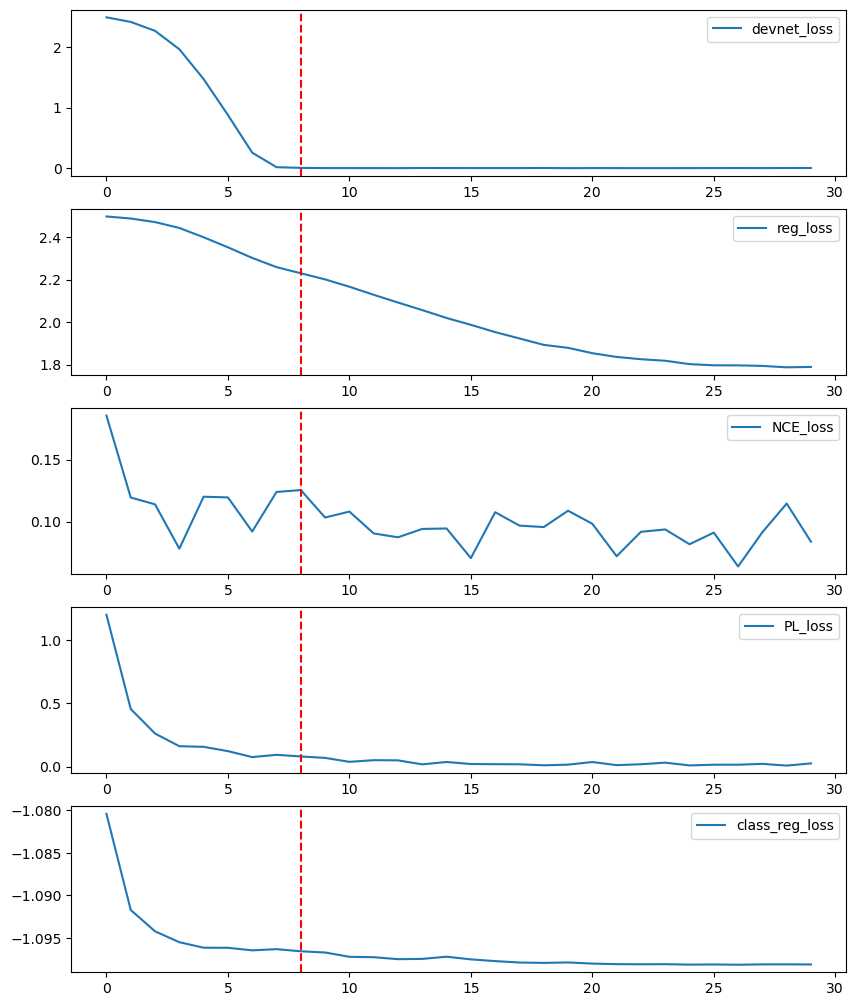

In [ ]:
temp = data["sub_train_results_loss"].mean(axis=1)
fig,ax = plt.subplots(temp.shape[1],1,figsize=(10,2.5 * temp.shape[1]))
if dir_path.__contains__("method13"):
    loss_name_list = ["devnet_loss", "reg_loss", "NCE_loss", "PL_loss", "class_reg_loss"]
elif dir_path.__contains__("VAE_LPIPS_DEVNET"):
    loss_name_list = ["rec_loss", "kl_loss", "devnet_loss", "reg_loss", "PL_loss", "class_reg_loss"]
else:
    loss_name_list = ["devnet_loss", "reg_loss", "NCE_loss", "PL_loss", "class_reg_loss"]
for idx, label in enumerate(loss_name_list):
    ax[idx].plot(temp[0:,idx], label=label)
    ax[idx].axvline(x=max_val_epoch, color='r', linestyle='--')
    ax[idx].legend()

# for i in range(5):
#     print(temp[0:,i])
print(temp[0:, 1])
plt.show()

In [ ]:
import math
-(1/3)*math.log(1/3)*3
-(0.01)*math.log(0.01) * 2 + (-0.98*math.log(0.98))

0.1119020568909309

In [ ]:
# data["sub_train_results_loss"].mean(axis=1)

In [ ]:
if "pre_epochs" in para_name_list:
    temp = []
    for item in file_name.split(","):
        if re.match("epochs=|lr=|reg_lambda", item):
            pass
        else:
            temp.append(item)
    data = np.load(f'../experiment/{",".join(temp)}', allow_pickle=True)

In [ ]:
plt.plot(data["pre_train_results_loss"].mean(axis=1))

KeyError: 'pre_train_results_loss is not a file in the archive'

In [ ]:
temp = data["sub_pre_train_results_loss"].mean(axis=1)
fig,ax = plt.subplots(2,1,figsize=(6, 6))
ax[0].plot(temp[0:,0], label="NCE_loss")
ax[1].plot(temp[0:,1], label="PL_loss") 
ax[0].legend()
ax[1].legend()
plt.show()

: 

In [ ]:
temp[0:,0]

: 

In [ ]:
temp[0:,1]

: 